# ANEOS WATER MODEL DOCUMENTATION NOTEBOOK

## ANEOS WATER<br>RELEASE VERSION: SLVTv0.3G1 <br>RELEASE DATE: 20241017

This Jupyter notebook provides documentation for an ANEOS model for water (H$_2$O) composition.

<b>Reference: Sarah T. Stewart (2024). ANEOS Equation of State Model for Water. Zenodo. http://doi.org/10.5281/zenodo.XXX, (https://github.com/ststewart/aneos-water)</b><p>

When this model EOS is used, cite this doi-tagged Zenodo GitHub repository.
Future updates to this EOS will be archived in Zenodo doi-tagged version-controlled releases.

Sarah T. Stewart <br>
sstewa56@asu.edu <br>
October 17, 2024<p>
    
<b>VERSION INFORMATION</b><br>
EOS Version: Water-ANEOS-SLVTv0.3G1<br>
SLVT# translates to solid-liquid-vapor-thermal model adjustment-version number<br>
G1 = the gridded EOS tables used the gridflag=1 definition for the grid points<br>
SLVTv0.3G1 Release Date: 20241017<br>
GitHub: https://github.com/ststewart/aneos-water/<p>

This is a solid-liquid-vapor ANEOS model with ionization for water. 

<b>USAGE</b><br>
This notebook is designed to be used in two modes:<br>
<ul>
<li> Development mode: ANEOS is called in the local directory to generate new model output. The user can varying the model input parameters and tabular gridding schemes. This notebook produces plots of the equation of state surface and comparisons to experimental data and ab initio calculations.
<li> Release mode: the notebook interacts with previously created ANEOS model output. This notebook provides detailed documentation of a version-controlled release of the model EOS and enables users to interact with the EOS surface and compare the model to data. 
</ul>

This notebook is distributed in release mode. Users who wish to use the development mode can obtain the ANEOS source code from: Thompson, S. L., Lauson, H. S., Melosh, H. J., Collins, G. S., & Stewart, S. T. (2019, November 1). M-ANEOS (Version 1.0). Zenodo. http://doi.org/10.5281/zenodo.3525030.<p>

Development mode:<br>
The notebook calls a local aneos executable which expects a formatted ANEOS.INPUT ascii file and an ascii gridtable.txt definition file that is generated by this notebook. ANEOS produces an ANEOS.OUTPUT ascii file and gridded ascii SESAME-format EOS tables.<br>
The user edits (1) the input parameters in ANEOS.INPUT (separately from this notebook) and (2) the output EOS table parameters in the notebook cell below.<br>
This notebook reads some parameters from ANEOS.INPUT and assumes that the variables are spaced by 10 columns.<br> 
When the notebook is run, the code issues a system call to run the aneos program in the local directory and reads in results from the ANEOS.OUTPUT, NEW-SESAME-STD.TXT, and NEW-SESAME-EXT.TXT files to make the plots below and to generate the GADGET format EOS table and other miscellaneous files.<p>

Release mode:<br>
This notebook reads in the provided ANEOS.INPUT, EOS tables, and other distribution data to generate the plots below. <p>

<b>OUTPUT/PROVIDED DATA FILES</b><br>
ANEOS.OUTPUT: Plain text file with an overview of the calculated equation of state. Look at this file for any errors in the EOS calculation.<br>

NEW-SESAME-STD.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy). 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-SESAME-EXT.TXT: SESAME-style table with extra variables from ANEOS. Contains the standard 201 table and non-standard 301-extra-variables EOS table. The 301 table has: density grid values, temperature grid values, sp. entropy(T,rho), sound speed(T,rho), sp. heat capacity(T,rho), KPA flag(T,rho). 2-D arrays list all densities, looping over each temperature. 301 table units: g/cm$^3$, K, MJ/K/kg, cm/s, MJ/K/kg, integer flag, integer flag. The KPA flag is an ANEOS output with phase information. <br>

NEW-SESAME-HUG.TXT: Ascii table with the reference state Hugoniot. <br>

NEW-SESAME-MDQ.TXT: Ascii 301-style SESAME table with the MDQ rating. <br>

NEW-SESAME-IEP-BILINEAR.TXT: Standard length Sandia-style SESAME file with 201 table and 301-style table containing the IEP values for bilinear interpolation. Format: 1-D interpolated density points, 1-D interpolated temperature points, 2-D IEP arrays for pressure, sp. internal energy, Helmholtz free energy, sound speed). IEP units are ratios to the original calculated ANEOS point values. Located in the interpolation subdirectory.<br>

NEW-SESAME-STD-NOTENSION.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, Helmholtz free energy) where the ANEOS tension region is removed and replaced with the solid-vapor coexistence region. 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/kg. <br>

NEW-SESAME-EXT-NOTENSION.TXT: SESAME-style table with extra variables from ANEOS. Contains the standard 201 table and non-standard 301-extra-variables EOS table where the ANEOS tension region is removed and replaced with the solid-vapor coexistence region. The 301 table has: density grid values, temperature grid values, sp. entropy(T,rho), sound speed(T,rho), sp. heat capacity(T,rho), KPA flag(T,rho). 2-D arrays list all densities, looping over each temperature. 301 table units: g/cm$^3$, K, MJ/K/kg, cm/s, MJ/K/kg, integer flag, integer flag. The KPA flag is an ANEOS output with phase information.

NEW-SESAME-GADGETINIT-NOTENSION.TXT: Standard length Sandia-style SESAME file with 201 table and 301 table (density, temperature, pressure, sp. internal energy, specific entropy) where the ANEOS tension region is removed and replaced with the solid-vapor coexistence region. 301 table units: g/cm$^3$, K, GPa, MJ/kg, MJ/K/kg. <br>

NEW-GADGET2-STD-NOTENSION.TXT: Standard GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of pressure, temperature, specific internal energy, sound speed. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, dynes/cm$^2$, K, erg/g, cm/s. <br>

NEW-GADGET2-EXT-NOTENSION.TXT: Extended variables GADGET2 EOS table generated by interpolating the ANEOS table with no tension. Format: number of density points, number of sp. entropy points, density grid values, sp. entropy grid values, 2-D arrays of Helmholtz free energy, KPA flag, MDQ flag. 2-D array values list all densities, looping over each value for specific entropy. Units: g/cm$^3$, erg/K/g, erg/g, integer flag, integer flag. <br>

The SESAME tabular equation of state formats are described in Lyon and Johnson (1992).<p>

<b>APPLICATIONS AND LIMITATIONS</b><br>

This model does not contain the high-pressure phases of water ice. It was developed to simulate shock-induced vaporization of ice Ih and uses the AQUA water EOS tables as a guide for the ANEOS input parameters.
    
The model does not include the negative slope ice Ih melt curve. To approximate the broader phase space, the reference density is greater than ice Ih and the melting temperature is reduced to obtain better agreement with the melt curve of the high pressure phases.

<b>ANEOS NOTES</b><br>
See comments about ANEOS development in https://github.com/ststewart/aneos-forsterite-2019

<b>CORRECTIONS AND IMPROVEMENTS</b><br>
Please send corrections to STS and any requests for data to include in the model-data comparison plots.<p>

In [1]:
# defines class objects for extEOStable and functions to read in ANEOS input and output
# READ THIS CODE IF YOU WANT TO UNDERSTAND THE OBJECT STRUCTURES

%run import-modules
from scipy.io import readsav # read IDL sav files

Platform:  Darwin Kernel Version 24.0.0: Tue Sep 24 23:37:25 PDT 2024; root:xnu-11215.1.12~1/RELEASE_ARM64_T6030
python version:  3.11.9
matplotlib version:  3.9.1
hvplot version:  0.10.0
numpy version:  2.0.1
pandas version:  2.2.2



In [2]:
# THIS CELL DEFINES FUNCTIONS AND CUSTOMIZATIONS
#
plt.rcParams.update(plt.rcParamsDefault)

#plt.rcParams["figure.figsize"] = (8,4)
#plt.rcParams["patch.force_edgecolor"] = True
#
# define index function (must be a more efficient way to do this...)
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
#
# this prevents some error messages for inline plotting in a jupyter notebook
%matplotlib inline 
#
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

    return artists


## USER INPUTS FOR SESAME AND GADGET2 TABLE CONSTRUCTION

If the code cell below is hidden, use the button above to reveal the cell.<p>

In development mode, the user must input:<br>
1. Header information for the SESAME table.<br>
2. Temperature, density and entropy grid points.<p>

The following code cell also includes the development mode flag and 
option to skip construction of a GADGET2 table if it is not needed.<p>

In [3]:
# -------------------------------------------------------------
# USER INPUTS
#-------------------------------------------------------------
# NOTEBOOK MODE
#-------------------------------------------------------------
#
DEVMODE = 1 # 1=development mode; 0=release mode
#
#-------------------------------------------------------------
# OPTIONS TO REMOVE TENSION REGION AND CONSTRUCT A GADGET2 TABLE
#-------------------------------------------------------------
#
REMOVETENSIONFLAG=1  # 0- keep tension region; 1- remove tension region
MAKEGADGETTABLE=1  # 1=make table; 0=do not make gadget2 table
#
#-------------------------------------------------------------
# USER MUST SET THESE VALUES TO DEFINE THE TABULATED EOS GRIDS
#-------------------------------------------------------------
#
# ====>>>>>> YOU NEED TO MAKE SURE THESE VALUES MATCH ANEOS.INPUT  <<<<=====
MODELNAME = 'Water-ANEOS-SLVTv0.3G1'
ORIGMODELNAME=MODELNAME
# Header information must all be compatible with float format
MATID = 1          # MATID number
DATE = 221017.     # Date as a single 6-digit number YYMMDD
VERSION = 0.3      # ANEOS Parameters Version number
FMN = 10           # Formula weight in atomic numbers for H2O
FMW = 18.          # Formula molecular weight (g/mol) for H2O
# The following define the default initial state for material in the 201 table
R0REF   = 1.25      # g/cm3 *** R0REF is inserted into the density array
K0REF   = 2.7E10   # dynes/cm2
T0REF   = 150.     # K -- *** T0REF is inserted into the temperature array
P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
#
#-------------------------------------------------------------
# EXAMPLE EOS GRID ARRAYS
#-------------------------------------------------------------
#
# Life is easier if the grid arrays are even in length (after adding T0REF and R0REF below)
#
# Flag for easily switching between different table grids during model development
# 0: low res for testing
# 1: high res for production: release version SLVT0.2G1
gridflag = 1
#
#------------------------------------------------------
if gridflag == 99: # low res for testing
    gridtvals  = [0, 10000., 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [30., 30.,20.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    gridrvals  = [1.e-20, 0.1, 2.6, 3.2, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [20, 10, 6, 30, 20] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    gridsvals  = [1.e-4,.25] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [80] # number of grid points in each segment
#
if gridflag == 0: # medium resolution grid <1E7 entries in 301 table. This is about 250,000 values.
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # 298 K is inserted into the table if it is not present in the original array
    gridtvals  = [100,10000., 20000.,1.e7] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [200.,200.,151.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-20, 0.1, 2.0, 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [150, 140, 206, 40] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [0.,0.03] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [1] # 1 for linear, 0 for log in each segment
    gridsnpts  = [500] # number of grid points in each segment
#
if gridflag == 1: # new form for the high resolution table entries in 301 table. Try for 1e6 values
    # define the temperature array for the SESAME table
    # 0 K is changed to 1 K
    # T0REF is inserted into the table if it is not present in the original array
    # need to have extra temperature resolution around the triple point
    gridtvals  = [1,100, 2000, 20000.,1.e6] # K -- this array defines the edges of the segments along the grid, 0 is changed to 1 below
    gridtstyle = [1,1,1,0] # 1 for linear, 0 for log in each segment
    gridtnpts  = [10,350., 350.,150.] # number of grid points in each segment
    # define the density array for the SESAME AND GADGET2 tables
    # R0REF is inserted into the table if it is not present in the original array
    # need to have extra density resolution around the triple point
    # 0 g/cm3 is removed if present
    gridrvals  = [1.e-30, 0.1, 2., 10., 30.] # g/cm3 -- this array defines the edges of the segments along the grid
    gridrstyle = [0, 1, 1, 1] # 1 for linear, 0 for log in each segment
    gridrnpts  = [251, 250,  250, 20] # number of grid points in each segment
    # define the specific entropy array for the GADGET2 table
    # 0 MJ/K/kg is removed if present
    gridsvals  = [1.e-4,.25] # MJ/K/kg -- this array defines the edges of the segments along the grid
    gridsstyle = [0] # 1 for linear, 0 for log in each segment
    gridsnpts  = [800] # number of grid points in each segment
#----------------------------------------
# END USER INPUT
#----------------------------------------

In [4]:
# THIS CELL HAS CODE TO GENERATE THE GRIDS AND WRITES TO A FILE TO BE READ BY ANEOS
print('GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.')
#-------------- the following code generates the temperature array
gridtarr = []
for iir in  range(1,len(gridtvals)):
    if gridtstyle[iir-1] == 1:
        # linear region
        temptarr = np.arange(gridtnpts[iir-1])/gridtnpts[iir-1]*(gridtvals[iir]-gridtvals[iir-1])+gridtvals[iir-1]
    if gridtstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridtvals[iir])-np.log10(gridtvals[iir-1]))/gridtnpts[iir-1]
        temptarr = np.power(10.,np.log10(gridtvals[iir-1])+(np.arange(gridtnpts[iir-1]))*logstep)
    gridtarr = np.concatenate((gridtarr,temptarr))
# check if T0REF already in the grid
#indexT0REF = get_indexes(T0REF,gridtarr)
indexT0REF = np.where(abs(T0REF-gridtarr)<1.E-4)[0]
if len(indexT0REF) == 0:
    # insert T0REF K into the array
    indexT0REF = np.where((gridtarr-T0REF)>0.)[0]
    gridtarr = np.concatenate((gridtarr[0:indexT0REF[0]],[T0REF],gridtarr[indexT0REF[0]::]))
    if indexT0REF[0]>1:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-2:indexT0REF[0]+3])
    else:
        print('Inserted the REFERENCE TEMPERATURE INTO THE ARRAY:',gridtarr[indexT0REF[0]-1:indexT0REF[0]+3])
else:
    print('T0REF already in temperature array: ',T0REF,gridrarr[indexT0REF[0]-2:indexT0REF[0]+2])
# Add 298 K reference
TROOM=298.
indexTROOM = np.where(abs(298.-gridtarr)<1.E-4)[0]
if len(indexTROOM) == 0:
    # insert T0REF K into the array
    indexTROOM = np.where((gridtarr-298.)>0.)[0]
    gridtarr = np.concatenate((gridtarr[0:indexTROOM[0]],[TROOM],gridtarr[indexTROOM[0]::]))
    if indexTROOM[0]>1:
        print('Inserted the ROOM TEMPERATURE INTO THE ARRAY:',gridtarr[indexTROOM[0]-2:indexTROOM[0]+3])
    else:
        print('Inserted the ROOM TEMPERATURE INTO THE ARRAY:',gridtarr[indexTROOM[0]-1:indexTROOM[0]+3])
else:
    print('TROOM already in temperature array: ',298.,gridrarr[indexTROOM[0]-2:indexTROOM[0]+2])
# Remove 0 K or convert to 1 K
#indexzero = get_indexes(0.,gridtarr)
#indexone = get_indexes(1.,gridtarr)
#if len(indexzero) == 1 and len(indexone) == 0:
#    gridtarr[indexzero] = 100.
#    print('Zero kelvin changed to 100 kelvin.')
#else:
print(gridtarr[0:5])
#    gridtarr = np.delete(gridtarr, indexzero)
print('Check no zero K index.')
#
#gridtsize = len(grdtarr)
print('Number of temperature points: ',len(gridtarr))
#print(gridtarr)
#------------ the following code generates the density array
gridrarr = []
for iir in range(1,len(gridrvals)):
    if gridrstyle[iir-1] == 1:
        # linear region
        temprarr = np.arange(gridrnpts[iir-1])/gridrnpts[iir-1]*(gridrvals[iir]-gridrvals[iir-1])+gridrvals[iir-1]
    if gridrstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridrvals[iir])-np.log10(gridrvals[iir-1]))/gridrnpts[iir-1]
        temprarr = np.power(10.,np.log10(gridrvals[iir-1])+(np.arange(gridrnpts[iir-1]))*logstep)
    gridrarr = np.concatenate((gridrarr,temprarr))
# check if R0REF already in the grid
#indexR0REF = get_indexes(R0REF,gridrarr)
indexR0REF = np.where(abs(R0REF-gridrarr)<1.E-4)[0]
if len(indexR0REF) == 0:
    # insert R0REF  into the array
    indexR0REF = np.where((gridrarr-R0REF)>0.)[0]
    gridrarr = np.concatenate((gridrarr[0:indexR0REF[0]],[R0REF],gridrarr[indexR0REF[0]::]))
    print('Inserted the REFERENCE DENSITY INTO THE ARRAY:',gridrarr[indexR0REF[0]-2:indexR0REF[0]+3])
    #print('NOT INSERTING REFERENCE DENSITY INTO THE ARRAY.')
else:
    print('R0REF already in density array: ',R0REF,gridrarr[indexR0REF[0]-2:indexR0REF[0]+2])
# Remove 0 g/cm3 if present
indexzero = get_indexes(0.,gridrarr)
if len(indexzero) == 1:
    print(gridrarr[0:5])
    gridrarr = np.delete(gridrarr, indexzero)
    print('Deleted zero g/cm3 index.')
#
#gridrsize = len(gridrarr)
print('Number of density points: ',len(gridrarr))
#print(gridrarr)
#------------ the following code generates the specific entropy array for gadget tables
gridsarr = []
for iir in range(1,len(gridsvals)):
    if gridsstyle[iir-1] == 1:
        # linear region
        tempsarr = np.arange(gridsnpts[iir-1])/gridsnpts[iir-1]*(gridsvals[iir]-gridsvals[iir-1])+gridsvals[iir-1]
    if gridsstyle[iir-1] == 0:
        # log region
        logstep = (np.log10(gridsvals[iir])-np.log10(gridsvals[iir-1]))/gridsnpts[iir-1]
        tempsarr = np.power(10.,np.log10(gridsvals[iir-1])+(np.arange(gridsnpts[iir-1]))*logstep)
    gridsarr = np.concatenate((gridsarr,tempsarr))
# Remove 0 MJ/K/kg if present
indexzero = get_indexes(0.,gridsarr)
if len(indexzero) == 1:
    gridsarr[indexzero]=1.e-20
#    gridsarr = np.delete(gridsarr, indexzero)
    print('replaced zero MJ/K/kg index with 1.E-20')
#gridssize = len(gridsarr)
#
print('Number of specific entropy points: ',len(gridsarr))
#print(gridsarr)

print('Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*3.)
#-----------------------------------------------------------
#
if DEVMODE:
    print('WRITING tablegrid.txt FOR ANEOS in the local directory.\n')
    # write the table arrays to a file for the ANEOS driver to read in
    tablegridfile = open("tablegrid.txt","w")  
    tablegridfile.write("{:.6e}".format(MATID)+'\n')  
    tablegridfile.write("{:.6e}".format(DATE)+'\n')  
    tablegridfile.write("{:.6e}".format(VERSION)+'\n')  
    tablegridfile.write("{:.6e}".format(FMN)+'\n')  
    tablegridfile.write("{:.6e}".format(FMW)+'\n')  
    tablegridfile.write("{:.6e}".format(R0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(K0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(T0REF)+'\n')  
    tablegridfile.write("{:.6e}".format(len(gridrarr))+'\n')  # number of density points
    tablegridfile.write("{:.6e}".format(len(gridtarr))+'\n')  # number of temperature points
    for i in range(0,len(gridrarr)):
        tablegridfile.write("{:.6e}".format(gridrarr[i])+'\n')
    for i in range(0,len(gridtarr)):
        tablegridfile.write("{:.6e}".format(gridtarr[i])+'\n')
    tablegridfile.close()
#
#-----------------------------------------------------
# Output GADGET2 Table information
if MAKEGADGETTABLE:
    print('Number of words in the extended GADGET2 EOS table (NR, NS, R, S, P, T, IE, CS, HFE, CV, KPA, MDQ)=',2.+len(gridrarr)+len(gridtarr)+len(gridrarr)*len(gridtarr)*8.)
#------------------------------------------------------

#----------------------------------------------------
# Sp. Internal Energy grid for Tillotson
#tillearr = np.power(10.,np.arange(600)/600.*6.-3.) # MJ/kg
#tillearr = np.append(0.,tillearr)
#print('Number of specific internal energy points for Tillotson EOS: ',len(tillearr))
#----------------------------------------------------
# Paranoia check
# make sure all table grid values are unique
if (len(np.unique(gridtarr))!=len(gridtarr)):
    print('NON-UNIQUE VALUES IN TEMP ARRAY')
    stopthecode
if (len(np.unique(gridrarr))!=len(gridrarr)):
    print('NON-UNIQUE VALUES IN DENSITY ARRAY')
    stopthecode
if (len(np.unique(gridsarr))!=len(gridsarr)):
    print('NON-UNIQUE VALUES IN SP. ENTROPY ARRAY')
    stopthecode
#if (len(np.unique(tillearr))!=len(tillearr)):
#    print('NON-UNIQUE VALUES IN SP. ENERGY ARRAY')
#    stopthecode

#----------------------------------------------------

print('\nDone generating EOS grids.\n')
print('\nCHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.\n')

#print(gridtarr[0:50])
# END TABLE GRIDDING INFORMATION

GENERATING ARRAYS FOR THE INDICES OF THE TABULATED EOS.
Inserted the REFERENCE TEMPERATURE INTO THE ARRAY: [143.42857143 148.85714286 150.         154.28571429 159.71428571]
Inserted the ROOM TEMPERATURE INTO THE ARRAY: [290.         295.42857143 298.         300.85714286 306.28571429]
[ 1.  10.9 20.8 30.7 40.6]
Check no zero K index.
Number of temperature points:  862
Inserted the REFERENCE DENSITY INTO THE ARRAY: [1.24   1.2476 1.25   1.2552 1.2628]
Number of density points:  772
Number of specific entropy points:  800
Number of words in the standard SESAME 301 table (NR, NT, R, T, P, IE, HFE)= 1998028.0
WRITING tablegrid.txt FOR ANEOS in the local directory.

Number of words in the extended GADGET2 EOS table (NR, NS, R, S, P, T, IE, CS, HFE, CV, KPA, MDQ)= 5325348.0

Done generating EOS grids.


CHECK THAT THE GRID ARRAYS ARE EVEN IN LENGTH.



In [5]:
if DEVMODE:
    # call aneos in the local directory
    # output file is in the local directory
    print('RUNNING IN DEVELOPMENT MODE')
    print('Calling aneos in the local directory.')
    completed = subprocess.run(['./aneos-mbam3'])
    print('Aneos call complete. CHECK THAT A NEW ANEOS.OUTPUT FILE WAS CREATED.')
    print('aneos call result: ', completed.returncode)
    print('Check ANEOS.OUTPUT file for errors.')
else:
    print('RUNNING IN RELEASE MODE: NO ANEOS SYSTEM CALL.')
    print('READING IN EOS DISTRIBUTION FILES.')

RUNNING IN DEVELOPMENT MODE
Calling aneos in the local directory.
Aneos call complete. CHECK THAT A NEW ANEOS.OUTPUT FILE WAS CREATED.
aneos call result:  0
Check ANEOS.OUTPUT file for errors.


In [6]:
# READ IN NEW ANEOS MODEL and fill the extEOStable class object
#------------------------------------------------------------------
NewEOS  = etab.extEOStable() # FIRST make new empty EOS object
NewEOS.loadextsesame('NEW-SESAME-EXT.TXT') # LOAD THE EXTENDED 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.loadstdsesame('NEW-SESAME-STD.TXT') # LOAD THE STANDARD 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.MODELNAME = MODELNAME # string set above in user input
NewEOS.MDQ = np.zeros((NewEOS.NT,NewEOS.ND)) # makes the empty MDQ array
#print(NewEOS.units) # these are the default units for SESAME rho-T tables
#'Units: g/cm3, K, GPa, MJ/kg, MJ/kg, MJ/K/kg, cm/s, MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

# Add the header info to the table. This could be done during the loading. 
# if made from this notebook, these values are set in the user-input above.
# ** MAKE SURE THEY MATCH ANEOS.INPUT **
NewEOS.MATID   = MATID
NewEOS.DATE    = DATE
NewEOS.VERSION = VERSION
NewEOS.FMN     = FMN
NewEOS.FMW     = FMW
NewEOS.R0REF   = R0REF
NewEOS.K0REF   = K0REF
NewEOS.T0REF   = T0REF
NewEOS.P0REF   = P0REF
#
# Load the information from ANEOS.INPUT and ANEOS.OUTPUT
NewEOS.loadaneos(aneosinfname='ANEOS.INPUT',aneosoutfname='ANEOS.OUTPUT')
#
# calculate the principal Hugoniot from the table
if DEVMODE:
    # calculate the Hugoniot and write to a file. This is from the ANEOS REFERENCE STATE
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF,writefilename='NEW-SESAME-HUG.TXT')
    # calculate the Hugoniot and write to a file pyrolitic Glass initial state, which is not on this EOS surface (proxy crystalline solid + liquid + vapor)
    # this result is basically the same as the requested Hugoniot at r0 and t0, where ANEOS interprets the initial density to be in tension. Differences at very low pressures.
    NewEOS.calcOffEOSHugoniot(r0=2.94,t0=298.,p0=1.e-4,e0=0.,r1=3.35,writefilename='NEW-SESAME-HUG-GLASS.TXT')
else:
    # just calculate the Hugoniot and put it in the EOS object
    NewEOS.calchugoniot(r0=NewEOS.R0REF,t0=NewEOS.T0REF)
#
# calculate the 1-bar profile; loop over temp
NewEOS.onebar.T = np.zeros(NewEOS.NT)
NewEOS.onebar.S = np.zeros(NewEOS.NT)
NewEOS.onebar.rho = np.zeros(NewEOS.NT)
it0 = np.where(NewEOS.T >= NewEOS.T0REF)[0]
id0 = np.arange(NewEOS.ND)#np.where(NewEOS.rho >= 0.8*NewEOS.R0REF)[0]
for iit in range(0,NewEOS.NT):
    NewEOS.onebar.T[iit] = NewEOS.T[iit]
    NewEOS.onebar.S[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.S[iit,id0])
    NewEOS.onebar.rho[iit] = np.interp(1.E-4,NewEOS.P[iit,id0],NewEOS.rho[id0])
    #print(iit,NewEOS.onebar.rho[iit],NewEOS.onebar.T[iit],NewEOS.onebar.S[iit]*1.E3)


Done loading ANEOS files.
ANEOS WAS CALLED WITH THE FOLLOWING INPUT, LOADED FROM FILE  ANEOS.INPUT
 *         EOS#      string for EOS name           .....Hugoniot initial........ long
 *                                                 T(eV)           Rho(g/cc)     flag
 * Reference solid Hugoniot at STP initial density and temperature
 ANEOS1    -1        'Water STS SLVTv0.3'          THUG=0.02568    RHUG=1.00     LONG

 *
 *         nelem     type      rho0      temp0(K)  press0    B0/-Cbulk Gamma0    Tdebye(K)
 *         V01       V02       V03       V04       V05       V06       V07       V08
 ANEOS2    2         4         1.25      150.      1.e6      2.70E10   0.60      -290.

rho0= 1.25
 *         TG model  Gamma     Esep      Tmelt(K)  ..Critical Pt..     Thermal Conduction
 *         or S1     3*C24     erg/g     or -Em    C53       C54       H0        C41
 *         V09       V10       V11       V12       V13       V14       V15       V16
 ANEOS3    1.        6.        2.9E10

In [7]:
#--------------------------------------------------------------------------
# Identify poor regions of the EOS table: SET THE MDQ FLAG
# MDQ=-5 means that there are much better model EOS formulations for these regions of phase space
#
# very high pressures and densities are known to be bad because of the gamma function values used in this model
badind = np.where(np.reshape(NewEOS.P,NewEOS.ND*NewEOS.NT) > 2000.0) # GPa
MDQtmp = np.reshape(NewEOS.MDQ,NewEOS.ND*NewEOS.NT)
MDQtmp[badind] = -5
# high-pressure solid is known to be a problem because no high-pressure phase transition
badind = np.where((np.reshape(NewEOS.P,NewEOS.ND*NewEOS.NT) > 23.0)&(np.reshape(NewEOS.KPA,NewEOS.ND*NewEOS.NT)==4)) # GPa
MDQtmp[badind] = -4
# so the high-pressure solid melt curve is also a problem
badind = np.where((np.reshape(NewEOS.P,NewEOS.ND*NewEOS.NT) > 23.0)&(np.reshape(NewEOS.KPA,NewEOS.ND*NewEOS.NT)==5)) # GPa
MDQtmp[badind] = -4
#
# return MDQ to the proper shape
NewEOS.MDQ = np.reshape(MDQtmp,(NewEOS.NT,NewEOS.ND))
#

In [8]:
# Make a NOTENSION TABLE and GADGET TABLE
################### REMOVE TENSION REGION ###########################
## The GADGET2 tables do not have a tension region. 
## If the gadget2 table is selected, then must generate a no-tension table
if MAKEGADGETTABLE:
    REMOVETENSIONFLAG=1  # 0- keep tension region; 1- remove tension region

# minimum pressure 1.E-30
# minimum sp energy about 1.E-4 before negative entropy region
# minimum sp entropy about 1.E-5 before negative entropy region
# minimum HFE about 1.E-3 before negative entropy region
# minimum sound speed about 1.E-10 before negative entropy region
# minimum sp heat capacity about 1.E-4 before negative entropy region

## FUTURE WORK: THIS SECTION COULD USE THE LEVER RULE TO FILL IN THE MISSING POINTS
## SINCE MANY VALUES ARE NEAR THE LOWER LIMITS IN THE SUBLIMATION REGION ANYWAY, 
## HERE, TENSION REGION VALUES ARE FILLED IN WITH THE ADJACENT S-V DOME VALUES
## This is obviously bad for interpolations. Fix for future work.
if REMOVETENSIONFLAG:
    # First make a deep copy of the original table with the tension region
    NewEOSorig = deepcopy(NewEOS)
    NewEOS.MODELNAME = NewEOS.MODELNAME+'notension'
    # THIS SECTION REWRITES NEGATIVE PRESSURE REGION
    # The tension region is in the solid-vapor phase boundary. 
    # Use the liquid-vapor phase boundary. Below the temperature of the triple point, it is the sublimation curve.
    # But the pressures for the solid calculation is spurious at very low pressures, so use the vapor pressure.
    # HFE = GFE + TS
    print('REMOVING TENSION REGION FROM THE ORIGINAL ANEOS TABLE.')
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.P[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            print(NewEOS.T[itt],badind)
#            if badind[0] > 0:
            if len(badind) > 0:
                #print(itt, len(badind), NewEOS.T[itt], 'tension only', NewEOS.P[itt,badind[0]-4:badind[0]+1])
                # at this temperature, all densities are the same pressure in the vapor dome
                # so use the adjacent positive pressure value
                # do the same for all the variables since there is very little change in this region of the dome.
                # Errors introduced by interpolating the vapor curve are comparable to
                # recalculating the lever rule. Would need to call ANEOS again to get good end point values
                # to calculate the mass-weighted value via the lever rule.
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1])
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                NewEOS.KPA[itt,badind] = np.full(len(badind),2)
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-1) # replaced tension region flag
#            else:
#                print('SOMETHING VERY WRONG WITH TENSION IN THE TABLE')
#                makethecodestop # please tell me a more graceful way to stop the notebook
    #
    # THIS SECTION RESETS NEGATIVE SPECIFIC ENTROPIES WITH ADJACENT VALUES OR MINIMUM POSITIVE VALUES
    # THESE VALUES TYPICALLY DEFINE THE COLD COMPRESSION LIMIT OF THE MATERIAL
    # OR SPURIOUS NEGATIVE ENTROPIES AT VERY LOW PRESSURES (IMPERFECT DEBYE MODEL IN ANEOS)
    for itt in range(NewEOS.NT-1,-1,-1):
        tmp = np.where(NewEOS.S[itt,:] < 0.)
        if (len(tmp[0]) > 0):
            badind = tmp[0]
            if badind[0] > 0:
                #print(itt, antarr[itt], andarr[badind[0]], badind[0],len(badind),'negative entropy', ansarr[itt,badind[0]],ansarr[itt,badind[0]-1])
                NewEOS.P[itt,badind] = np.full(len(badind),NewEOS.P[itt,badind[0]-1]) # use the adjacent pressure at this temperature in the dome
                NewEOS.U[itt,badind] = np.full(len(badind),NewEOS.U[itt,badind[0]-1])
                NewEOS.S[itt,badind] = np.full(len(badind),NewEOS.S[itt,badind[0]-1])
                NewEOS.A[itt,badind] = np.full(len(badind),NewEOS.A[itt,badind[0]-1])
                NewEOS.cs[itt,badind] = np.full(len(badind),NewEOS.cs[itt,badind[0]-1])
                NewEOS.cv[itt,badind] = np.full(len(badind),NewEOS.cv[itt,badind[0]-1])
                #NewEOS.KPA[itt,badind]  # leave as original region flag
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag
                #print('Some NEGATIVE  S AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt],NewEOS.P[itt,badind[0]-1],NewEOS.P[itt,badind[0]-2]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
            if badind[0] == 0:
                print('All S VALUES NEGATIVE AT THIS INDEX, TEMP(K): ',itt, NewEOS.T[itt]) #, badind[0],len(badind),'negative entropy', NewEOS.S[itt,badind[0]])
                NewEOS.S[itt,badind] = np.full(len(badind),1.E-10)            
                NewEOS.U[itt,badind] = np.full(len(badind),1.E-10) # also replace the negative sp. internal energies           
                NewEOS.MDQ[itt,badind] = np.full(len(badind),-2) # negative entropies flag

    #### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
    if DEVMODE:
        #### WRITE NEW SESAME TABLE WITH NO TENSION REGION
        #     WRITE STANDARD (SHORT) SESAME FILE
        #     WRITE SESAME TABLE TO FILE LIMITED TO P, E, HFE
        NewEOS.writestdsesame(writestdsesfname="NEW-SESAME-STD-NOTENSION.TXT")
        NewEOS.writeextsesame(writeextsesfname="NEW-SESAME-EXT-NOTENSION.TXT")
    if DEVMODE:
        #### WRITE NEW SESAME TABLE WITH NO TENSION REGION
        #     WRITE STANDARD (SHORT) SESAME FILE
        #     WRITE SESAME TABLE TO FILE LIMITED TO P, E, S
        NewEOS.writegadgetinitsesame(writegadgetinitsesfname="NEW-SESAME-GADGETINIT-NOTENSION.TXT")

#### ONLY WRITE A NEW TABLE IN DEVELOPMENT MODE
if DEVMODE:
    #### WRITE MDQ Flag as a 301-style table
    NewEOS.writemdqsesame(writemdqsesfname="NEW-SESAME-MDQ.TXT")
#
AneosEOS = deepcopy(NewEOS)   
#
#--------------------------------------------------------------------------
########## MAKE GADGET2 EOS TABLE ARRAYS ###################
# LATER WE CAN TURN THIS INTO A FUNCTION IN THE GADGET EOS OBJECT
# FLAG IS SET ABOVE IN THE USER INPUT SECTION
# MAKEGADGETTABLE = 1 # 1 - do it ; 0 - skip it
if MAKEGADGETTABLE:
    print('Starting interpolation for GADGET table.')
    GadEOS  = etab.extGADtable() # make new empty Gadget EOS object
    #
    # rho array is andarr to match the SESAME table
    # S array is gridsarr
    GadEOS.ND  = len(gridrarr)
    GadEOS.NS  = len(gridsarr)
    GadEOS.rho = gridrarr
    GadEOS.S   = gridsarr
    GadEOS.P   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.T   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.U   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.A   = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cs  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.cv  = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.KPA = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MDQ = np.zeros((GadEOS.NS,GadEOS.ND))
    GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-linear-int'
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, apply minimum values
    gadpmin  = np.min(NewEOS.P) # GPa
    gadsmin  = 1.E-30     # MJ/K/kg
    gademin  = np.min(NewEOS.U)    # MJ/kg
    gadtmin  = 1.     # K
    gadcmin  = np.min(NewEOS.cs) # cm/s
    gadcvmin = 0.     # MJ/K/kg
    gadamin  = np.min(NewEOS.A) # can be negative    # MJ/kg
    print('Minimum values used in the rational function interpolation scheme:')
    print('gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin=')
    print(gadpmin,gadsmin,gademin,gadtmin,gadcmin,gadcvmin,gadamin)
    #
    # some combinations of density and sp. entropy are not in the EOS surface
    # in these cases, fill the region with the adjacent real values from the original T-RHO table
    # ----------------------------------------------------------
    # SIMPLE LINEAR INTERPOLATION TO FLIP T-RHO to S-RHO table
    print("LINEAR INTERPOLATION FOR GADGET TABLE.")
    for iid in range(0,GadEOS.ND):
        # same density arrays for the T-rho table and S-rho table
        sall1d = NewEOS.S[:,iid]
        pall1d = NewEOS.P[:,iid]
        eall1d = NewEOS.U[:,iid]
        tall1d = NewEOS.T[:]
        call1d = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d = NewEOS.A[:,iid]
        kall1d = NewEOS.KPA[:,iid]
        mdqall1d = NewEOS.MDQ[:,iid]
        # interpolate P at the new S
        testinterp = interpolate.interp1d(sall1d,pall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.P[tmpind,iid] = pall1d[NewEOS.NT-1]
        # interpolate E at the new S
        testinterp = interpolate.interp1d(sall1d,eall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.U[tmpind,iid] = eall1d[NewEOS.NT-1]
        # interpolate T at the new S
        testinterp = interpolate.interp1d(sall1d,tall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.T[tmpind,iid] = tall1d[NewEOS.NT-1]
        # interpolate sound speed at the new S
        testinterp = interpolate.interp1d(sall1d,call1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cs[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate sp. heat capacity at the new S
        testinterp = interpolate.interp1d(sall1d,cvall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.cv[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate HFE at the new S
        testinterp = interpolate.interp1d(sall1d,aall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.A[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate phase information KPA flag at the new S
        testinterp = interpolate.interp1d(sall1d,kall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.KPA[tmpind,iid] = call1d[NewEOS.NT-1]
        # interpolate model development quality flag at the new S
        testinterp = interpolate.interp1d(sall1d,mdqall1d,bounds_error=False)
        tmpind = np.where(gridsarr < np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = testinterp(gridsarr[tmpind])
        tmpind = np.where(gridsarr >= np.max(sall1d))[0]
        GadEOS.MDQ[tmpind,iid] = call1d[NewEOS.NT-1]
    #
    GadEOSlin = deepcopy(GadEOS)
    #
    '''
    # ----------------------------------------------------------
    # 1D RATIONAL FUNCTION INTERPOLATION METHOD FROM KERLEY
    print("RATIONAL FUNCTION INTERPOLATION TO GENERATE GADGET2 EOS TABLE.")
    for iid in range(0,GadEOS.ND):
        GadEOS.MODELNAME = NewEOS.MODELNAME+'-gadget-ratfunc-int'
        #
        # same density arrays for the T-rho table and S-rho table
        sall1d  = NewEOS.S[:,iid]
        pall1d  = NewEOS.P[:,iid]
        eall1d  = NewEOS.U[:,iid]
        tall1d  = NewEOS.T[:]
        call1d  = NewEOS.cs[:,iid]
        cvall1d = NewEOS.cv[:,iid]
        aall1d  = NewEOS.A[:,iid]
        #kall1d = NewEOS.KPA[:,iid]
        #mdqall1d = NewEOS.MDQ[:,iid]
        #
        # interpolate P at the new S
        GadEOS.P[:,iid] = rf1d(sall1d,pall1d,gridsarr,gadpmin)
        # interpolate E at the new S
        GadEOS.U[:,iid] = rf1d(sall1d,eall1d,gridsarr,gademin)
        # interpolate T at the new S
        GadEOS.T[:,iid] = rf1d(sall1d,tall1d,gridsarr,gadtmin)
        # interpolate sound speed at the new S
        GadEOS.cs[:,iid] = rf1d(sall1d,call1d,gridsarr,gadcmin)
        # interpolate sp. heat capacity at the new S
        GadEOS.cv[:,iid] = rf1d(sall1d,cvall1d,gridsarr,gadcvmin)
        # interpolate HFE at the new S
        GadEOS.A[:,iid] = rf1d(sall1d,aall1d,gridsarr,gadamin)
        # Do not interpolate KPA or MDQ with rational function interp. Use Linear.
        # do not overwrite the linear interpolation above.
    '''
    #
    print('Done interpolating the gadget2 table.')
    #print('Using RATIONAL FUNCTION INTERPOLATION EXCEPT FOR KPA and MDQ FLAGS (bilinear).')
    if DEVMODE:
        # ONLY WRITE GADGET2 TABLE TO DISK IN DEVELOPMENT MODE
        #### WRITE NEW GADGET2 TABLE WITH NO TENSION REGION
        #### This ascii table format follows the sesame table format of 5 columns of numbers in 16.8e format
        #### the STYLE variable is just a counter to 5 to know when to write a newline
        GadEOS.writestdgadget(writestdgadgetfname="NEW-GADGET-STD-NOTENSION.TXT")
        GadEOS.writeextgadget(writeextgadgetfname="NEW-GADGET-EXT-NOTENSION.TXT")


REMOVING TENSION REGION FROM THE ORIGINAL ANEOS TABLE.
268.2857 [371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388]
262.8571 [371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388]
257.4286 [371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389]
252.0 [371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390]
246.5714 [371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390]
241.1429 [371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391]
235.7143 [371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392]
230.2857 [371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393]
224.8571 [371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393]
219.4286 [371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388
 389 390 391 392 393 394

In [9]:
# Download the AQUA EOS tables from https://github.com/mnijh/AQUA
# LOAD AQUA EOS
MODELNAME='AQUA-v1.0'
# Header information must all be compatible with float format
MATID = 1.0        # MATID number
DATE = 210714.     # Date as a single 6-digit number YYMMDD
VERSION = 1.0      # ANEOS Parameters Version number
FMN = 10           # Formula weight in atomic numbers for NaCa2Fe4Mg30Al3Si24O89 left out Na and added 1 Si
FMW = 18.          # Formula molecular weight (g/mol) for NaCa2Fe4Mg30Al3Si24O89
# The following define the default initial state for material in the 201 table
R0REF   = 1.0      # g/cm3 *** R0REF is inserted into the density array
K0REF   = 2E10     # dynes/cm2
T0REF   = 298.     # K -- *** T0REF is inserted into the temperature array
P0REF   = 1.E6     # dynes/cm2 -- this defines the principal Hugoniot calculated below
#
# READ IN NEW ANEOS MODEL and fill the extEOStable class object
# source in eostable.py
#------------------------------------------------------------------
NewEOS  = etab.extEOStable() # FIRST make new empty EOS object
#NewEOS.loadextsesame('NEW-SESAME-EXT.TXT') # LOAD THE EXTENDED 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
#NewEOS.loadstdsesame('NEW-SESAME-STD.TXT') # LOAD THE STANDARD 301 SESAME FILE GENERATED BY STSM VERSION OF ANEOS
NewEOS.MODELNAME = MODELNAME # string set above in user input
#print(NewEOS.units) # these are the default units for SESAME rho-T tables
#'Units: g/cm3, K, GPa, MJ/kg, MJ/kg, MJ/K/kg, cm/s, MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

# Add the header info to the table. This could be done during the loading. 
# if made from this notebook, these values are set in the user-input above.
# ** MAKE SURE THEY MATCH ANEOS.INPUT **
NewEOS.MATID   = MATID
NewEOS.DATE    = DATE
NewEOS.VERSION = VERSION
NewEOS.FMN     = FMN
NewEOS.FMW     = FMW
NewEOS.R0REF   = R0REF
NewEOS.K0REF   = K0REF
NewEOS.T0REF   = T0REF
NewEOS.P0REF   = P0REF
#

# read in AQUA rho-T table

# columns and units
# rho kg/m3; temp K; press Pa; ad grad; s J/K/kg; U J/kg; c m/s; mmw kg/mol; xion; xd; phase 
# path to AQUA EOS file
filename = '/Users/sts/Library/CloudStorage/Dropbox-Personal/eos/github/AQUA-master/Tables/aqua_eos_rhot_v1_0.dat'
nrho = 1501
ntemp = 301

rhoarr=np.loadtxt(filename,skiprows=21,usecols=[0])
tarr=np.loadtxt(filename,skiprows=21,usecols=[1])
parr=np.loadtxt(filename,skiprows=21,usecols=[2])
adarr=np.loadtxt(filename,skiprows=21,usecols=[3])
sarr=np.loadtxt(filename,skiprows=21,usecols=[4])
uarr=np.loadtxt(filename,skiprows=21,usecols=[5])
csarr=np.loadtxt(filename,skiprows=21,usecols=[6])
phasearr=np.loadtxt(filename,skiprows=21,usecols=[10]) # phase integer (main are minus 7 to plus 5)
print(rhoarr[0:10])
print(tarr[0:10])
print(parr[0:10])
print(sarr[0:10])
print(uarr[0:10])
print(csarr[0:10])
gridrarr = np.unique(rhoarr)
gridtarr = np.unique(tarr)

print('Min pressure (Pa)',min(parr))
# reshape the arrays from (density,temperature) to (temperature, density)



# standard SESAME TABLE UNITS
NewEOS.units = 'Units: rho g/cm3, T K, P GPa, U MJ/kg, A MJ/kg, S MJ/K/kg, cs cm/s, cv MJ/K/kg, KPA flag. 2D arrays are (NT,ND).'

NewEOS.ND  = nrho
NewEOS.NT  = ntemp 
NewEOS.rho = gridrarr /1.e3  # kg/m3 -> g/cm3
NewEOS.T   = gridtarr # K
tmp = deepcopy(parr.reshape(NewEOS.ND,NewEOS.NT))
NewEOS.P   = np.swapaxes(tmp,0,1)/1.E9 # Pa->GPa
tmp = []
tmp = deepcopy(uarr.reshape(NewEOS.ND,NewEOS.NT))
NewEOS.U   = np.swapaxes(tmp,0,1)/1.E6 # J/kg->MJ/kg
tmp = []
tmp = deepcopy(sarr.reshape(NewEOS.ND,NewEOS.NT))
NewEOS.S   = np.swapaxes(tmp,0,1)/1.E6 # J/K/kg -> MJ/K/kg
tmp = []
tmp = deepcopy(csarr.reshape(NewEOS.ND,NewEOS.NT))
NewEOS.cs  = np.swapaxes(tmp,0,1)*100. # m/s -> cm/s
tmp = []
tmp = deepcopy(phasearr.reshape(NewEOS.ND,NewEOS.NT))
NewEOS.KPA  = np.swapaxes(tmp,0,1) # integer flag
tmp = []
NewEOS.MDQ = np.zeros((NewEOS.NT,NewEOS.ND)) # makes the empty MDQ integer array

# Wagner, W., & Pruß, A. (2002). The IAPWS Formulation 1995 for the Thermodynamic Properties of Ordinary Water Substance for General and Scientific Use. Journal of Physical and Chemical Reference Data, 31(2), 387–535. https://doi.org/10.1063/1.1461829
# Read in phase boundaries from NIST computer code based on Wagner & Pruß 2002
# UNITS: t K, rho kg/m3, P MPa, E kJ/kg, S kJ/kg/K
# have as IDL sav files
dir='nist-phase-boundaries/'
meltcurvefile = dir+'meltcurve.sav'
meltcurve = readsav(meltcurvefile)
print(meltcurve.keys())
#print(meltcurve['tmeltall'])
satcurvefile = dir+'satcurve.sav'
satcurve = readsav(satcurvefile)
print(satcurve.keys())
subcurvefile = dir+'subcurve.sav'
subcurve = readsav(subcurvefile)
print(subcurve.keys())


NewEOS.vc.T = satcurve['tsatall'] # K
NewEOS.vc.P = satcurve['psatall']/1.e3 # MPa -> GPa
NewEOS.vc.rl = satcurve['dlsatall']/1.e3 # kg/m3 -> g/cm3
NewEOS.vc.rv = satcurve['dvsatall']/1.e3 # kg/m3 -> g/cm3
NewEOS.vc.Sl = satcurve['slsatall']/1.e3 # kJ/K/kg -> MJ/K/kg
NewEOS.vc.Sv = satcurve['svsatall']/1.e3 # kJ/K/kg -> MJ/K/kg
NewEOS.vc.Ul = satcurve['elsatall']/1.e3 # kJ/kg -> MJ/kg
NewEOS.vc.Uv = satcurve['evsatall']/1.e3 # kJ/kg -> MJ/kg

NewEOS.mc.T = meltcurve['tmeltall']# K
NewEOS.mc.P = meltcurve['pmeltall']/1.e3 # MPa -> GPa
NewEOS.mc.rl = meltcurve['dmeltall']/1.e3 # kg/m3 -> g/cm3
NewEOS.mc.rs = meltcurve['dice1meltall']/1.e3 # kg/m3 -> g/cm3
NewEOS.mc.Sl = meltcurve['smeltall']/1.e3 # kJ/K/kg -> MJ/K/kg
NewEOS.mc.Ss = meltcurve['sice1meltall']/1.e3 # kJ/K/kg -> MJ/K/kg
NewEOS.mc.Ul = meltcurve['emeltall']/1.e3 # kJ/kg -> MJ/kg
NewEOS.mc.Us = meltcurve['eice1meltall']/1.e3 # kJ/kg -> MJ/kg

print(len(NewEOS.mc.rl))
print(len(NewEOS.mc.rs))

AquaEOS = deepcopy(NewEOS)
print('done loading AQUA EOS')
print('done loading NIST phase boundaries')


[1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10 1.e-10]
[100.       102.329299 104.712855 107.151931 109.64782  112.201845
 114.815362 117.489755 120.226443 123.026877]
[1.08566258e-14 4.26211267e-14 1.62366286e-13 6.00616166e-13
 2.15879294e-12 7.54420905e-12 2.56492489e-11 8.48900755e-11
 2.73663851e-10 8.59819027e-10]
[28614.4363 28026.0882 27451.6009 26890.6673 26342.988  25808.2703
 25286.2287 24776.5841 24279.0644 23793.4037]
[2766797.91 2770028.93 2773335.53 2776719.44 2780182.4  2783726.24
 2787352.79 2791063.97 2794861.73 2798748.07]
[248.008602 250.877063 253.77924  256.715464 259.686069 262.691393
 265.73178  268.80758  271.919146 275.066836]
Min pressure (Pa) 1.08566258e-14
dict_keys(['tmeltall', 'dmeltall', 'pmeltall', 'smeltall', 'emeltall', 'dice1meltall', 'sice1meltall', 'eice1meltall', 'nneg'])
dict_keys(['tsatall', 'dlsatall', 'dvsatall', 'psatall', 'evsatall', 'elsatall', 'svsatall', 'slsatall'])
dict_keys(['tsuball', 'dsuball', 'picesuball', 'ssuball

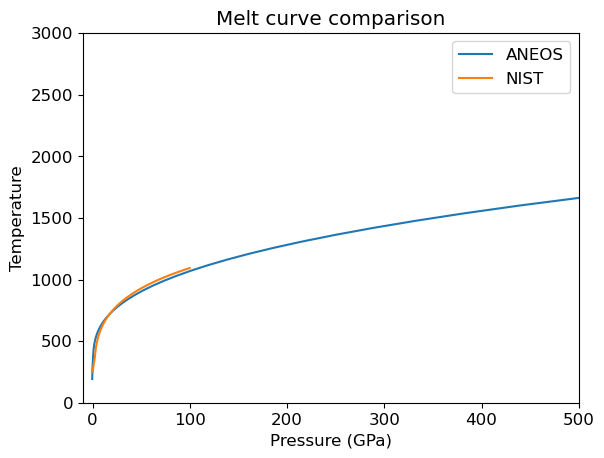

In [10]:
plt.rcParams.update({'font.size': 12})

plt.plot(AneosEOS.mc.Pl,AneosEOS.mc.T,label='ANEOS')
plt.plot(AquaEOS.mc.P,AquaEOS.mc.T,label='NIST')
plt.title('Melt curve comparison')
plt.legend()
plt.xlabel('Pressure (GPa)')
plt.ylabel('Temperature')
plt.xlim(-10,500)
plt.ylim(0,3000)
plt.savefig(ORIGMODELNAME+'-melt-curve.pdf')

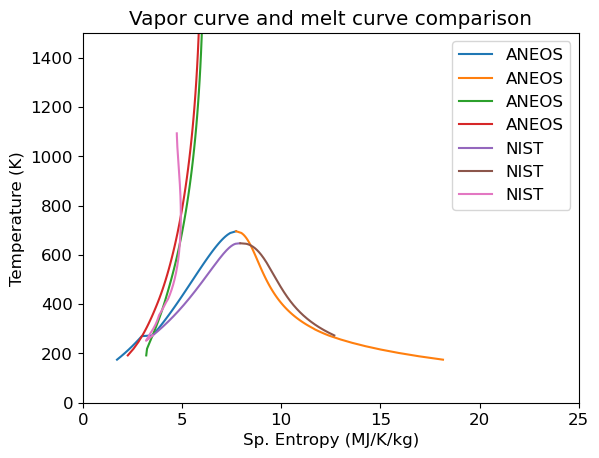

In [11]:

plt.plot(AneosEOS.vc.Sl*1.e3,AneosEOS.vc.T,label='ANEOS')
plt.plot(AneosEOS.vc.Sv*1.e3,AneosEOS.vc.T,label='ANEOS')
plt.plot(AneosEOS.mc.Sl*1.e3,AneosEOS.mc.T,label='ANEOS')
plt.plot(AneosEOS.mc.Ss*1.e3,AneosEOS.mc.T,label='ANEOS')
plt.plot(AquaEOS.vc.Sl*1.e3,AquaEOS.vc.T,label='NIST')
plt.plot(AquaEOS.vc.Sv*1.e3,AquaEOS.vc.T,label='NIST')
plt.plot(AquaEOS.mc.Sl*1.e3,AquaEOS.mc.T,label='NIST')

#plt.plot(AquaEOS.mc.Ss*1.e3,AquaEOS.mc.T,label='NIST')
plt.legend()
plt.xlabel('Sp. Entropy (MJ/K/kg)')
plt.ylabel('Temperature (K)')
plt.title('Vapor curve and melt curve comparison')
plt.xlim(0,25)
plt.ylim(0,1500)
#plt.xscale('log')

plt.savefig(ORIGMODELNAME+'-melt-vapor-curve.pdf')

[3.1984 3.2383 3.3767 3.5178 3.5748 3.6329 3.692  3.7521 3.8132 3.8751]
[-2.9690e-01 -2.1785e-01 -1.1819e-01  4.8861e-09  5.4368e-02  1.1426e-01
  1.8016e-01  2.5260e-01  3.3217e-01  4.1963e-01]
[3.52320013 3.51179213 3.49978313 3.48716313 3.47392513 3.46006213
 3.44556913 3.43044713 3.41470013 3.39833913]
[6.11657000e-07 1.03755812e-02 2.07505508e-02 3.11255211e-02
 4.15004899e-02 5.18754587e-02 6.22504306e-02 7.26253963e-02
 8.30003682e-02 9.33753339e-02]


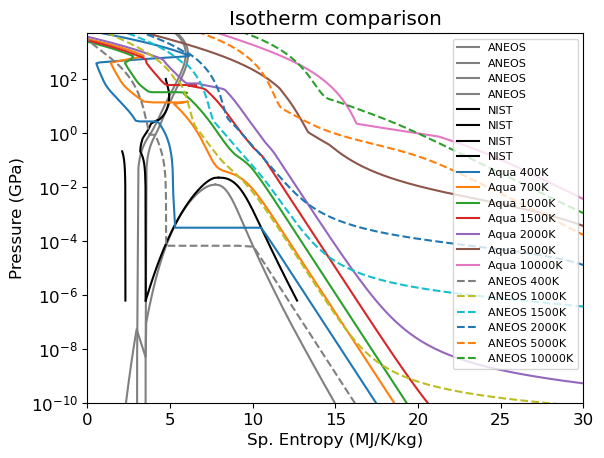

In [12]:

plt.plot(AneosEOS.vc.Sl*1.e3,AneosEOS.vc.Pl,label='ANEOS',color='grey')
plt.plot(AneosEOS.vc.Sv*1.e3,AneosEOS.vc.Pv,label='ANEOS',color='grey')
plt.plot(AneosEOS.mc.Sl*1.e3,AneosEOS.mc.Pl,label='ANEOS',color='grey')
plt.plot(AneosEOS.mc.Ss*1.e3,AneosEOS.mc.Ps,label='ANEOS',color='grey')
plt.plot(AquaEOS.vc.Sl*1.e3,AquaEOS.vc.P,label='NIST',color='black')
plt.plot(AquaEOS.vc.Sv*1.e3,AquaEOS.vc.P,label='NIST',color='black')
plt.plot(AquaEOS.mc.Sl*1.e3,AquaEOS.mc.P,label='NIST',color='black')
plt.plot(AquaEOS.mc.Ss*1.e3,AquaEOS.mc.P[0:21],label='NIST',color='black')

ind = np.where(AquaEOS.T >= 400)[0]
plt.plot(AquaEOS.S[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 400K')
ind = np.where(AquaEOS.T >= 700)[0]
plt.plot(AquaEOS.S[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 700K')
ind = np.where(AquaEOS.T >= 1000)[0]
plt.plot(AquaEOS.S[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 1000K')
ind = np.where(AquaEOS.T >= 1500)[0]
plt.plot(AquaEOS.S[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 1500K')
ind = np.where(AquaEOS.T >= 2000)[0]
plt.plot(AquaEOS.S[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 2000K')
ind = np.where(AquaEOS.T >= 5000)[0]
plt.plot(AquaEOS.S[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 5000K')
ind = np.where(AquaEOS.T >= 10000)[0]
plt.plot(AquaEOS.S[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 10000K')


ind = np.where(AneosEOS.T >= 400)[0]
plt.plot(AneosEOS.S[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 400K')
ind = np.where(AneosEOS.T >= 1000)[0]
plt.plot(AneosEOS.S[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 1000K')
ind = np.where(AneosEOS.T >= 1500)[0]
plt.plot(AneosEOS.S[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 1500K')
ind = np.where(AneosEOS.T >= 2000)[0]
plt.plot(AneosEOS.S[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 2000K')
ind = np.where(AneosEOS.T >= 5000)[0]
plt.plot(AneosEOS.S[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 5000K')
ind = np.where(AneosEOS.T >= 10000)[0]
plt.plot(AneosEOS.S[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 10000K')

plt.legend(fontsize=8)
plt.xlabel('Sp. Entropy (MJ/K/kg)')
plt.ylabel('Pressure (GPa)')
plt.title('Isotherm comparison')
plt.xlim(0,30)
plt.ylim(1.e-10,5000)
plt.yscale('log')

#print(AneosEOS.vc.Sl)
print(AneosEOS.mc.Sl[0:10]*1.e3)
print(AneosEOS.mc.Pl[0:10])
print(AquaEOS.mc.Sl[0:10]*1.e3)
print(AquaEOS.mc.P[0:10])

plt.savefig(ORIGMODELNAME+'-isotherms.pdf')

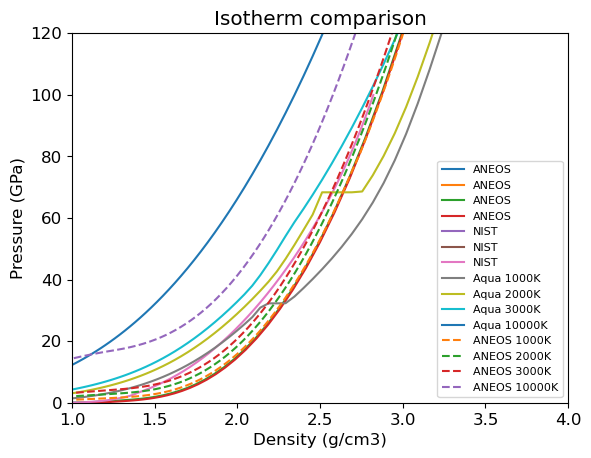

In [13]:

plt.plot(AneosEOS.vc.rl,AneosEOS.vc.Pl,label='ANEOS')
plt.plot(AneosEOS.vc.rv,AneosEOS.vc.Pv,label='ANEOS')
plt.plot(AneosEOS.mc.rl,AneosEOS.mc.Pl,label='ANEOS')
plt.plot(AneosEOS.mc.rs,AneosEOS.mc.Ps,label='ANEOS')
plt.plot(AquaEOS.vc.rl,AquaEOS.vc.P,label='NIST')
plt.plot(AquaEOS.vc.rv,AquaEOS.vc.P,label='NIST')
plt.plot(AquaEOS.mc.rl,AquaEOS.mc.P,label='NIST')

ind = np.where(AquaEOS.T >= 1000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 1000K')
ind = np.where(AquaEOS.T >= 2000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 2000K')
ind = np.where(AquaEOS.T >= 3000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 3000K')
ind = np.where(AquaEOS.T >= 10000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 10000K')


ind = np.where(AneosEOS.T >= 1000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 1000K')
ind = np.where(AneosEOS.T >= 2000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 2000K')
ind = np.where(AneosEOS.T >= 3000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 3000K')
ind = np.where(AneosEOS.T >= 10000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 10000K')

plt.legend(fontsize=8)
plt.xlabel('Density (g/cm3)')
plt.ylabel('Pressure (GPa)')
plt.title('Isotherm comparison')
plt.xlim(1,4)
plt.ylim(0,120)
#plt.yscale('log')
#plt.xscale('log')

#plt.savefig('Cn0.5.pdf')
#print(AneosEOS.vc.Sl)
plt.savefig(ORIGMODELNAME+'-isotherms2.pdf')

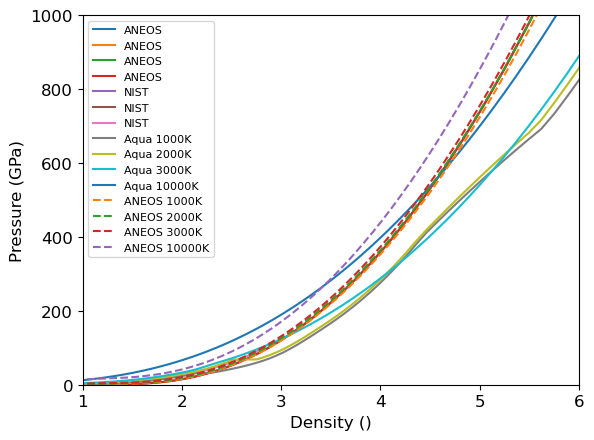

In [14]:

plt.plot(AneosEOS.vc.rl,AneosEOS.vc.Pl,label='ANEOS')
plt.plot(AneosEOS.vc.rv,AneosEOS.vc.Pv,label='ANEOS')
plt.plot(AneosEOS.mc.rl,AneosEOS.mc.Pl,label='ANEOS')
plt.plot(AneosEOS.mc.rs,AneosEOS.mc.Ps,label='ANEOS')
plt.plot(AquaEOS.vc.rl,AquaEOS.vc.P,label='NIST')
plt.plot(AquaEOS.vc.rv,AquaEOS.vc.P,label='NIST')
plt.plot(AquaEOS.mc.rl,AquaEOS.mc.P,label='NIST')

ind = np.where(AquaEOS.T >= 1000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 1000K')
ind = np.where(AquaEOS.T >= 2000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 2000K')
ind = np.where(AquaEOS.T >= 3000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 3000K')
ind = np.where(AquaEOS.T >= 10000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 10000K')


ind = np.where(AneosEOS.T >= 1000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 1000K')
ind = np.where(AneosEOS.T >= 2000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 2000K')
ind = np.where(AneosEOS.T >= 3000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 3000K')
ind = np.where(AneosEOS.T >= 10000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 10000K')

plt.legend(fontsize=8)
plt.xlabel('Density ()')
plt.ylabel('Pressure (GPa)')
plt.xlim(1,6)
plt.ylim(0,1000)

plt.savefig(ORIGMODELNAME+'-isotherms3.pdf')

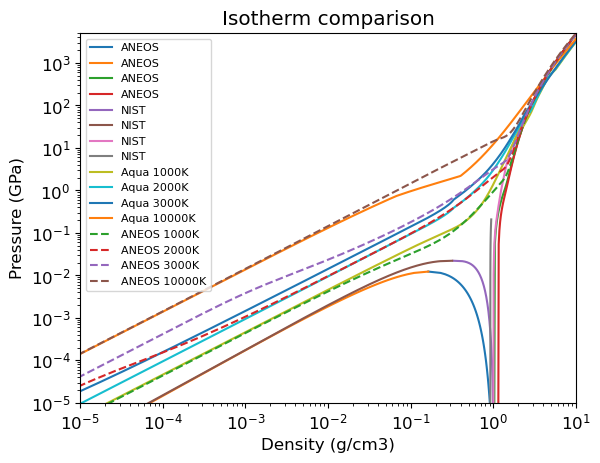

In [15]:

plt.plot(AneosEOS.vc.rl,AneosEOS.vc.Pl,label='ANEOS')
plt.plot(AneosEOS.vc.rv,AneosEOS.vc.Pv,label='ANEOS')
plt.plot(AneosEOS.mc.rl,AneosEOS.mc.Pl,label='ANEOS')
plt.plot(AneosEOS.mc.rs,AneosEOS.mc.Ps,label='ANEOS')
plt.plot(AquaEOS.vc.rl,AquaEOS.vc.P,label='NIST')
plt.plot(AquaEOS.vc.rv,AquaEOS.vc.P,label='NIST')
plt.plot(AquaEOS.mc.rl,AquaEOS.mc.P,label='NIST')
plt.plot(AquaEOS.mc.rs,AquaEOS.mc.P[0:21],label='NIST')

ind = np.where(AquaEOS.T >= 1000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 1000K')
ind = np.where(AquaEOS.T >= 2000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 2000K')
ind = np.where(AquaEOS.T >= 3000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 3000K')
ind = np.where(AquaEOS.T >= 10000)[0]
plt.plot(AquaEOS.rho,AquaEOS.P[ind[0],:],label='Aqua 10000K')


ind = np.where(AneosEOS.T >= 1000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 1000K')
ind = np.where(AneosEOS.T >= 2000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 2000K')
ind = np.where(AneosEOS.T >= 3000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 3000K')
ind = np.where(AneosEOS.T >= 10000)[0]
plt.plot(AneosEOS.rho,AneosEOS.P[ind[0],:],'--',label='ANEOS 10000K')

plt.legend(fontsize=8)
plt.xlabel('Density (g/cm3)')
plt.ylabel('Pressure (GPa)')
plt.title('Isotherm comparison')
plt.xlim(1.e-5,10)
plt.ylim(1.e-5,5000)
plt.yscale('log')
plt.xscale('log')

plt.savefig(ORIGMODELNAME+'-isotherms4.pdf')

In [16]:
AneosEOS.calchugoniot(r0=1,t0=250)
AquaEOS.calchugoniot(r0=1,t0=250)
NewEOS = deepcopy(AneosEOS)

[673.69 624.54 639.52 671.46 688.04 707.04 728.52 752.6  779.41 809.1 ]
[-2.9690e-01 -2.1785e-01 -1.1819e-01  4.8861e-09  5.4368e-02  1.1426e-01
  1.8016e-01  2.5260e-01  3.3217e-01  4.1963e-01]
[632.11448171 629.02929371 625.84139971 622.54693171 619.14267071
 615.62617571 611.99595971 608.25170071 604.39446771 600.42701671]
[6.11657000e-07 1.03755812e-02 2.07505508e-02 3.11255211e-02
 4.15004899e-02 5.18754587e-02 6.22504306e-02 7.26253963e-02
 8.30003682e-02 9.33753339e-02]


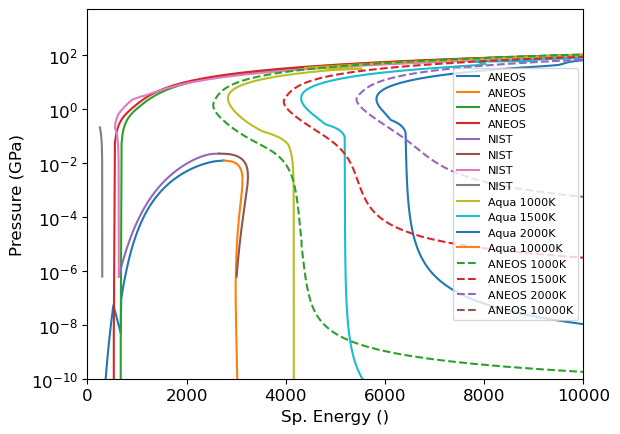

In [17]:

plt.plot(AneosEOS.vc.Ul*1.e3,AneosEOS.vc.Pl,label='ANEOS')
plt.plot(AneosEOS.vc.Uv*1.e3,AneosEOS.vc.Pv,label='ANEOS')
plt.plot(AneosEOS.mc.Ul*1.e3,AneosEOS.mc.Pl,label='ANEOS')
plt.plot(AneosEOS.mc.Us*1.e3,AneosEOS.mc.Ps,label='ANEOS')
plt.plot(AquaEOS.vc.Ul*1.e3,AquaEOS.vc.P,label='NIST')
plt.plot(AquaEOS.vc.Uv*1.e3,AquaEOS.vc.P,label='NIST')
plt.plot(AquaEOS.mc.Ul*1.e3,AquaEOS.mc.P,label='NIST')
plt.plot(AquaEOS.mc.Us*1.e3,AquaEOS.mc.P[0:21],label='NIST')

ind = np.where(AquaEOS.T >= 1000)[0]
plt.plot(AquaEOS.U[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 1000K')
ind = np.where(AquaEOS.T >= 1500)[0]
plt.plot(AquaEOS.U[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 1500K')
ind = np.where(AquaEOS.T >= 2000)[0]
plt.plot(AquaEOS.U[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 2000K')
ind = np.where(AquaEOS.T >= 10000)[0]
plt.plot(AquaEOS.U[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 10000K')


ind = np.where(AneosEOS.T >= 1000)[0]
plt.plot(AneosEOS.U[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 1000K')
ind = np.where(AneosEOS.T >= 1500)[0]
plt.plot(AneosEOS.U[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 1500K')
ind = np.where(AneosEOS.T >= 2000)[0]
plt.plot(AneosEOS.U[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 2000K')
ind = np.where(AneosEOS.T >= 10000)[0]
plt.plot(AneosEOS.U[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 10000K')

plt.legend(fontsize=8)
plt.xlabel('Sp. Energy ()')
plt.ylabel('Pressure (GPa)')
plt.xlim(0,10000)
plt.ylim(1.e-10,5000)
plt.yscale('log')

#print(AneosEOS.vc.Sl)
print(AneosEOS.mc.Ul[0:10]*1.e3)
print(AneosEOS.mc.Pl[0:10])
print(AquaEOS.mc.Ul[0:10]*1.e3)
print(AquaEOS.mc.P[0:10])
plt.savefig(ORIGMODELNAME+'-isotherms5.pdf')

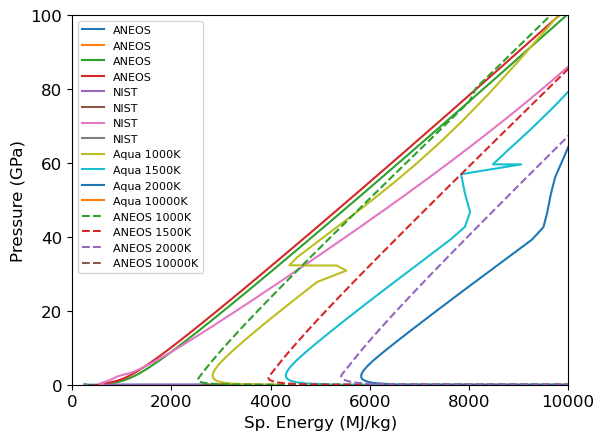

In [18]:

plt.plot(AneosEOS.vc.Ul*1.e3,AneosEOS.vc.Pl,label='ANEOS')
plt.plot(AneosEOS.vc.Uv*1.e3,AneosEOS.vc.Pv,label='ANEOS')
plt.plot(AneosEOS.mc.Ul*1.e3,AneosEOS.mc.Pl,label='ANEOS')
plt.plot(AneosEOS.mc.Us*1.e3,AneosEOS.mc.Ps,label='ANEOS')
plt.plot(AquaEOS.vc.Ul*1.e3,AquaEOS.vc.P,label='NIST')
plt.plot(AquaEOS.vc.Uv*1.e3,AquaEOS.vc.P,label='NIST')
plt.plot(AquaEOS.mc.Ul*1.e3,AquaEOS.mc.P,label='NIST')
plt.plot(AquaEOS.mc.Us*1.e3,AquaEOS.mc.P[0:21],label='NIST')

ind = np.where(AquaEOS.T >= 1000)[0]
plt.plot(AquaEOS.U[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 1000K')
ind = np.where(AquaEOS.T >= 1500)[0]
plt.plot(AquaEOS.U[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 1500K')
ind = np.where(AquaEOS.T >= 2000)[0]
plt.plot(AquaEOS.U[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 2000K')
ind = np.where(AquaEOS.T >= 10000)[0]
plt.plot(AquaEOS.U[ind[0],:]*1.e3,AquaEOS.P[ind[0],:],label='Aqua 10000K')


ind = np.where(AneosEOS.T >= 1000)[0]
plt.plot(AneosEOS.U[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 1000K')
ind = np.where(AneosEOS.T >= 1500)[0]
plt.plot(AneosEOS.U[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 1500K')
ind = np.where(AneosEOS.T >= 2000)[0]
plt.plot(AneosEOS.U[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 2000K')
ind = np.where(AneosEOS.T >= 10000)[0]
plt.plot(AneosEOS.U[ind[0],:]*1.e3,AneosEOS.P[ind[0],:],'--',label='ANEOS 10000K')

plt.legend(fontsize=8)
plt.xlabel('Sp. Energy (MJ/kg)')
plt.ylabel('Pressure (GPa)')
plt.xlim(0,10000)
plt.ylim(0,100)

plt.savefig(ORIGMODELNAME+'-isotherms6.pdf')

# References
Haldemann, J., Alibert, Y., Mordasini, C., & Benz, W. (2020). AQUA: a collection of H2O equations of state for planetary models. Astronomy & Astrophysics, 643, A105. https://doi.org/10.1051/0004-6361/202038367

Kovačević, T., González-Cataldo, F., Stewart, S. T., & Militzer, B. (2022). Miscibility of rock and ice in the interiors of water worlds. Scientific Reports, 12(1), 13055. https://doi.org/10.1038/s41598-022-16816-w

Stewart S. T., Carter, P. J., Lock, S. J., Davies, E. J., Petaev, M. I., Jacobsen, S. B. (2024). Planetesimal Impact Vapor Plumes and Nebular Shocks form Chondritic Mixtures, The Planetary Science Journal, submitted.

Wagner, W., & Pruß, A. (2002). The IAPWS Formulation 1995 for the Thermodynamic Properties of Ordinary Water Substance for General and Scientific Use. Journal of Physical and Chemical Reference Data, 31(2), 387–535. https://doi.org/10.1063/1.1461829

## ANEOS references
Collins, Gareth S., and H. Jay Melosh (2014). Improvements to ANEOS for multiple phase transitions. 45th Lunar Planet. Sci. Conf. Abs. 2664.

Melosh, H. J. (2007). A hydrocode equation of state for SiO$_2$. Meteoritics & Planetary Science, 42(12), 2079-2098.

Thompson, S. L. (1990). ANEOS analytic equations of state for shock physics codes input manual. SANDIA REPORT SAND, 89-2951.

Thompson, S. L., & Lauson, H. S. (1974). Improvements in the Chart D radiation-hydrodynamic CODE III: Revised analytic equations of state (No. SC-RR--71-0714). Sandia Labs.

Thompson, S. L., Lauson, H. S., Melosh, H. J., Collins, G. S., & Stewart, S. T. (2019, November 1). M-ANEOS (Version 1.0). Zenodo. http://doi.org/10.5281/zenodo.3525030

Stewart, S. T. (2019). ANEOS Code Modification: Thermal model adjustment parameter. https://github.com/ststewart/aneos-forsterite-2019/EOS-docs/

# ANEOS Input Parameters

EOS -1: low temperature solid model<br>
THUG, RHUG: initial state for the Hugoniot calculated in ANEOS.OUTPUT. <br>
<p>
V01 nelem = 2: This model has 2 elements: H, O. <br>
V02 model type=4: solid-liquid-gas model with ionization<br>
V03 rho0=1.25 g/cm3: reference solid density at the reference state. This value is greater than ice Ih because of limitations in the melt curve model.<br>
V04 T0=150 K: reference state temperature.<br>
V05 P0=1.e6 dynes/cm2: reference state pressure.<br>
V06 B0=2.70E10 dynes/cm2: bulk modulus.<br>
V07 gamma0=0.6: Grueneisen parameter.<br>
V08 Tdebye=-290.0 K: Negative means use full Debye model.<br>
<p>
V09 TG model=1: based on free-volume theory, generate a derivative of the bulk modulus near 4.<br>
V10 3*C24=6: Compromise value for the gamma function to span solid to liquid. <br>
V11 Esep=2.90E19 erg/g: Zero temperature separation energy. Fitted to match the triple point pressure and critical point temperature.<br>
V12 Tmelt=273 K: Melting temperature at reference pressure. <br>
V13 C53=0 erg/g: Critical point adjustment parameter. Not used.<br>
V14 C54=0. [dimless]: Critical point adjustment parameter. Not used.<br>
V15 H0=0: Thermal conduction parameter. Not used.<br>
V16 C41=0: Thermal conduction parameter. Not used.<br>
<p>
V17 rhomin=0 g/cm3: minimum density for the solid. Defines the tension region in the model. The default value is 0.8*rho0 when rhomin=0.<br>
V18=0.0 g/cm3: Solid-solid phase transition parameter. Density at onset of transition. Not used.<br>
V19=0.0 g/cm3: Solid-solid phase transition parameter. Density at end of transition. Not used.<br>
V20=0.0 dynes/cm2: Solid-solid phase transition parameter. Pctr, pressure at the center of the transition. Not used.<br>
V21=0.0: Solid-solid phase transition parameter. First derivative of Pctr with respect to density. Not used.<br>
V22=0.0: Solid-solid phase transition parameter. Second derivative of Pctr with respect to density. Not used.<br>
V23 Hfusion=1.40E9 erg/g: Latent heat of fusion at the reference pressure. Fitted to provide a melt curve similar to forsterite.<br>
V24 rhol/rhos=0.89: Volume change on melting. Large volume change similar to 0.9053 for forsterite at 1 bar. <br>
<p>
V25 upper=0.0: Upper limit to cold compression curve extension. Default=1. Setting to zero means use default value.<br>
V26 lower=0.: Default=0.<br>
V27 alpha=0.05: Liquid model parameter ($0<\alpha<1$, default=0.3).<br>
V28 beta=0.1: Liquid model parameter ($0<\beta<1$, default=0.1). beta cannot be equal to gamma.<br>
V29 gamma=0.2: Liquid model parameter ($0<\gamma<1$, default=0.2). beta cannot be equal to gamma.<br>
V30 C60=0: Gamma model adjustment parameter. Default=0.<br>
V31 C61=-0.40: Gamma model adjustment parameter to provide best fit to the critical point. Default=0.<br>
V32 C62=0.5: Critical point adjustment parameter. Default=0. ($0<C63<1$). Fitted to improve critical point.<br>
<p>
V33 Ionization model=0=Saha model.<br>
V34-V35=0: Reactive chemistry model not used.<br>
Melosh molecular clusters model for the critical point:<br>
V36 Natom=3: number of atoms in molecular clusters. Using Melosh extension for triatomic vapor.<br>
V37 Ebind=4.67 eV: Binding energy<br>
V38 RotDOF=3.0: Rotational degrees of freedom, 2 for diatomic molecule<br>
V39 Rbond=96E-19 cm: Length of molecular bond (cm)<br>
V40 VibDOF=3: Numer of vibrational degrees of freedom, 1 for diatomic molecule<br>
<p>
V41 Tdebye=2000 K: Vibrational Debye temperature<br>
V42 Mieflag=1: Flag for Mie potential (1) or Morse potential.<br>
V43 a_exp=1.5: Power in Mie potential (1 to 2). Fitted to improve critical point<br>
V44 $f_{cv}=1.0$: Adjust heat capacity in high temperature limit. $C_v=3f_{cv}NkT$.<br>
V45 QCC1: 1.E-30. low density value to transition to ideal gas.<br>
V45 QCC6: 1.E5. high temperature psi value to transition to ideal gas.<br>
V46 to V48=0: Variables not used.<br>
<p>
Atomic number and atom fraction water:<br>
1         0.6667<br>
8         0.3333<p>


# Development Notes

STSM 10/17/2024
This version of ANEOS water was developed to be able to run the same EOS model in gadget, CTH, and pyKO codes. This EOS was used in Kovačević et al. (2022) while in development for Stewart et al. (submitted 2024). <p>



End of File

##### 